In [1]:
!git clone https://github.com/rrrajjjj/adherence.git


Cloning into 'adherence'...


In [2]:
!mv adherence/data .

In [76]:
import pandas as pd 
import matplotlib.pyplot as plt

In [77]:
patient_users = ["juan", "ana", "jesus", "susana", "joan", "anton", "gloria", "ricard", "ismael", "carles", "alfredo", "rosacano", "rafael", "jose", "godo", "mcarmen", "juanfran", "Carmen", "Hassan", "Marisa",
    "PP01", "PP02", "PP03", "PP04", "PP05", "PP06", "PP07",
    "user_it01", "user_it01a", "user_it02", "user_it02a", "user_it03", "user_it03a", "user_it04", "user_it04a", "user_it05", "user_it05a", "user_it06", "user_it06a", "user_it07", "user_it07a", "user_it08", "user_it08a", "user_it09", "user_it09a", 'user_it10', "user_it10a"

]

In [78]:
patient_df = pd.read_csv("data/patient.csv")

,PATIENT_ID,HOSPITAL_ID,PATIENT_USER,PASSWORD,CREATION_TIME,DELETE_TIME,NAME,SURNAME1,SURNAME2,PARETIC_SIDE,...,GENDER,SKIN_COLOR,BIRTH_DATE,VIDEOGAME_EXP,COMPUTER_EXP,COMMENTS,PTN_HEIGHT_CM,ARM_SIZE_CM,DEMO,VERSION
0,1,1,pedro,62949cfb8082f4b3199ca5ac967dbdcc,2021-03-09 10:27:35,NaN,Nuevo nombre,NaN,NaN,RIGHT,...,MALE,FDC3AD,1965-02-03,NaN,NaN,NaN,175,22,0,4
1,4,1,david,5c5c43253ccd77e4f20d8b5b770abdd6,2021-03-11 09:47:07,NaN,NaN,NaN,NaN,RIGHT,...,MALE,FDC3AD,1996-05-10,0.0,0.0,NaN,180,22,0,27
2,5,1,andres,cd5f0d9ebda683e1eb688aa77034100e,2021-03-11 09:48:46,NaN,NaN,NaN,NaN,LEFT,...,MALE,FDC3AD,2004-02-03,NaN,NaN,NaN,175,22,0,4
3,6,1,bob,902390a32f54e8527db3a1090bc2289c,2021-03-11 09:58:21,2021-07-13 12:09:08,NaN,NaN,NaN,LEFT,...,FEMALE,FDC3AD,1983-02-03,NaN,NaN,NaN,175,22,0,5
4,7,1,mario_deleted_2023-10-03 18:58:05,262c0cb9d38e0c4ca30a7bdff5d18758,2021-03-11 09:59:14,2023-10-03 18:58:05,NaN,NaN,NaN,LEFT,...,MALE,FDC3AD,1958-02-03,NaN,NaN,NaN,175,22,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3353,3620,233,Olmedo,529ebc6f8c0c3297e422877bc88d376d,2025-02-10 17:00:02,NaN,NaN,NaN,NaN,NONE,...,MALE,D09C80,1931-08-18,NaN,NaN,NaN,165,22,0,1
3354,3621,11,Ramon,296f6e6f488b2ec914c321a6799f4090,2025-02-11 12:37:48,NaN,NaN,NaN,NaN,LEFT,...,MALE,D09C80,1951-11-15,NaN,NaN,NaN,175,22,0,1
3355,3622,233,Piquer,26cf08c5fbb0d49079295115acfbdd23,2025-02-11 13:00:09,NaN,NaN,NaN,NaN,NONE,...,MALE,D09C80,1936-02-25,NaN,NaN,NaN,170,22,0,1
3356,3623,65,Manuel C,0a1a909bfac91c16d4340d9d68014525,2025-02-11 13:30:21,NaN,NaN,NaN,NaN,RIGHT,...,MALE,D09C80,1965-06-04,NaN,NaN,NaN,180,22,0,1


In [ ]:
patient_df = patient_df[patient_df["HOSPITAL_ID"].isin([11, 40, 41])]

In [79]:
patient_ids = [patient_df.iloc[i]["PATIENT_ID"] for i in range(len(patient_df)) if patient_df.iloc[i]["PATIENT_USER"] in patient_users]


(47, 47)

In [ ]:
id_to_hospital_name = {
    11: "Vall d'Hebron",
    40: "INRCA", 
    41: "Sint Maartenskliniek"
    
}

In [ ]:
patient_to_hospital = {i[1]["PATIENT_ID"]:id_to_hospital_name[i[1]["HOSPITAL_ID"]] for i in patient_df.iterrows()}

In [ ]:
prescriptions = pd.read_csv("data/prescription_app.csv")


,PRESCRIPTION_ID,PATIENT_ID,PROTOCOL_ID,STARTING_DATE,ENDING_DATE,WEEKDAY,SESSION_DURATION,AR_MODE
0,1,205,201,2022-05-20 10:42:54,2023-03-14 00:08:42,MONDAY,600,NONE
1,2,205,201,2022-05-20 10:42:54,2023-03-14 00:08:42,TUESDAY,600,NONE
2,3,205,201,2022-05-20 10:42:54,2023-03-14 00:08:42,WEDNESDAY,600,NONE
3,4,205,201,2022-05-20 10:42:54,2023-03-14 00:08:42,THURSDAY,600,NONE
4,5,205,201,2022-05-20 10:42:54,2023-03-14 00:08:42,FRIDAY,600,NONE


In [83]:
sessions = pd.read_csv("data/session_app.csv")


,SESSION_ID,PRESCRIPTION_ID,STARTING_DATE,ENDING_DATE,STATUS,SESSION_LOG_PARSED
0,1,145,2022-05-20 13:03:57,2022-05-20 13:04:05,ABORTED,0
1,2,89,2022-05-20 13:04:09,2022-05-20 13:04:31,ABORTED,0
2,3,89,2022-05-20 13:04:34,2022-05-20 13:04:47,ABORTED,0
3,4,89,2022-05-20 13:04:51,2022-05-20 13:05:18,ABORTED,0
4,5,89,2022-05-20 13:05:21,2022-05-20 13:05:26,ABORTED,0


In [ ]:
recordings = pd.read_csv("data/recording_app.csv")
recordings = recordings[recordings["RECORDING_KEY"] == "sessionDuration(seconds)"]


,RECORDING_ID,SESSION_ID,PATIENT_ID,PROTOCOL_ID,RECORDING_KEY,RECORDING_VALUE
3,4,1,91,210,sessionDuration(seconds),0
7,8,2,91,201,sessionDuration(seconds),2
11,12,3,91,201,sessionDuration(seconds),2
15,16,4,91,201,sessionDuration(seconds),15
19,20,5,91,201,sessionDuration(seconds),0


In [85]:
patient_df = patient_df[patient_df["PATIENT_ID"].isin(patient_ids)]


,PATIENT_ID,HOSPITAL_ID,PATIENT_USER,PASSWORD,CREATION_TIME,DELETE_TIME,NAME,SURNAME1,SURNAME2,PARETIC_SIDE,...,GENDER,SKIN_COLOR,BIRTH_DATE,VIDEOGAME_EXP,COMPUTER_EXP,COMMENTS,PTN_HEIGHT_CM,ARM_SIZE_CM,DEMO,VERSION
81,204,11,godo,cbab7f0e43818fd23b9fede4b74a8ea0,2022-04-21 13:30:08,NaN,NaN,NaN,NaN,LEFT,...,MALE,FDC3AD,1955-10-19,0.0,1.0,NaN,175,22,0,3
633,775,40,user_it02,271e788dcfd6a19f951160752e2da063,2023-10-26 14:33:17,NaN,NaN,NaN,NaN,LEFT,...,FEMALE,FDC3AD,1936-01-15,0.0,0.0,NaN,165,22,0,4
645,787,40,user_it04,52c201f2dbe59dc07f5a42bad72ebfe6,2023-10-31 09:33:09,NaN,NaN,NaN,NaN,LEFT,...,FEMALE,A37552,1965-02-07,0.0,0.0,NaN,162,22,0,4
646,788,40,user_it03,b10d74b41f032a83e6b0ee3e7a30b18f,2023-10-31 09:34:30,NaN,NaN,NaN,NaN,LEFT,...,MALE,6B4731,1980-01-01,0.0,1.0,NaN,190,22,0,2
801,946,11,jesus,42482e03c3d7102462fc52ff3a783538,2023-12-04 09:54:37,NaN,NaN,NaN,NaN,LEFT,...,MALE,FDC3AD,1961-11-24,NaN,NaN,NaN,175,22,0,1


In [86]:
prescriptions = prescriptions[prescriptions["PATIENT_ID"].isin(patient_ids)]


,PRESCRIPTION_ID,PATIENT_ID,PROTOCOL_ID,STARTING_DATE,ENDING_DATE,WEEKDAY,SESSION_DURATION,AR_MODE
46781,46782,946,223,2023-12-04 09:42:32,2100-01-01 00:00:00,MONDAY,300,NONE
46782,46783,946,223,2023-12-04 09:42:32,2100-01-01 00:00:00,TUESDAY,300,NONE
46783,46784,946,223,2023-12-04 09:42:32,2100-01-01 00:00:00,WEDNESDAY,300,NONE
46784,46785,946,223,2023-12-04 09:42:32,2100-01-01 00:00:00,THURSDAY,300,NONE
46785,46786,946,223,2023-12-04 09:42:32,2100-01-01 00:00:00,FRIDAY,300,NONE


In [87]:
prescriptions = prescriptions[prescriptions["ENDING_DATE"] != "0000-00-00 00:00:00"]

In [88]:
sessions = sessions[sessions["PRESCRIPTION_ID"].isin(prescriptions["PRESCRIPTION_ID"])]


,RECORDING_ID,SESSION_ID,PATIENT_ID,PROTOCOL_ID,RECORDING_KEY,RECORDING_VALUE
3,4,1,91,210,sessionDuration(seconds),0
7,8,2,91,201,sessionDuration(seconds),2
11,12,3,91,201,sessionDuration(seconds),2
15,16,4,91,201,sessionDuration(seconds),15
19,20,5,91,201,sessionDuration(seconds),0


In [89]:
session_to_date = {i[1]["SESSION_ID"]:i[1]["STARTING_DATE"] for i in sessions.iterrows()}

In [91]:
prescription_to_session = {i[1]["PRESCRIPTION_ID"]:i[1]["SESSION_ID"] for i in sessions.iterrows()}


1117

In [92]:
prescription_to_patient_id = {i[1]["PRESCRIPTION_ID"]:i[1]["PATIENT_ID"] for i in prescriptions.iterrows()}


2249

In [ ]:
sessions["PATIENT_ID"] = [prescription_to_patient_id[i] for i in sessions["PRESCRIPTION_ID"]]


,SESSION_ID,PRESCRIPTION_ID,STARTING_DATE,ENDING_DATE,STATUS,SESSION_LOG_PARSED,PATIENT_ID
9218,9220,46824,2023-12-04 12:51:49,2023-12-04 12:58:13,CLOSED,0,947
9222,9224,46817,2023-12-04 14:26:16,2023-12-04 14:33:21,CLOSED,0,947
9223,9225,46831,2023-12-04 14:33:47,NaN,ARMED,0,947
9224,9226,46810,2023-12-04 14:34:30,2023-12-04 14:40:57,CLOSED,0,947
9228,9230,46817,2023-12-04 14:53:14,2023-12-04 14:55:13,ABORTED,0,947


In [94]:
count = 0
for i in prescriptions["PRESCRIPTION_ID"]:
    if i not in prescription_to_session:
        count+=1
        prescription_to_session[i] = 0


1132

In [95]:
# Convert the date columns from strings to datetime objects
prescriptions['STARTING_DATE'] = pd.to_datetime(prescriptions['STARTING_DATE'])
prescriptions['ENDING_DATE'] = pd.to_datetime(prescriptions['ENDING_DATE'])

# Calculate the difference in weeks and convert to integer (floor division)
prescriptions['WEEKS'] = ((prescriptions['ENDING_DATE'] - prescriptions['STARTING_DATE']) / pd.Timedelta(weeks=1)).astype(int)



WEEKS
0       581
3924    177
3932    175
3969    140
3922    133
2       121
3       119
3929    105
3919     60
3954     56
3920     55
3946     49
3923     48
3950     43
3953     41
1        40
4        39
3952     38
3949     30
3961     28
3930     28
3918     26
3921     25
7        17
3947     14
3945     12
3948     11
6        11
8         7
18        7
10        4
3943      3
9         3
5         3
Name: count, dtype: int64

In [97]:
recordings = recordings[recordings["SESSION_ID"].isin(sessions["SESSION_ID"])]
recordings["SESSION_DATE"] = [session_to_date[session] for session in recordings.SESSION_ID]


,RECORDING_ID,SESSION_ID,PATIENT_ID,PROTOCOL_ID,RECORDING_KEY,RECORDING_VALUE,SESSION_DATE
31688,31689,9220,947,205,sessionDuration(seconds),300,2023-12-04 12:51:49
31704,31705,9224,947,208,sessionDuration(seconds),300,2023-12-04 14:26:16
31708,31709,9226,947,223,sessionDuration(seconds),300,2023-12-04 14:34:30
31724,31725,9230,947,208,sessionDuration(seconds),70,2023-12-04 14:53:14
31768,31769,9244,946,205,sessionDuration(seconds),300,2023-12-04 18:22:44


In [105]:
# Convert the date columns to datetime
prescriptions['STARTING_DATE'] = pd.to_datetime(prescriptions['STARTING_DATE'])
prescriptions['ENDING_DATE'] = pd.to_datetime(prescriptions['ENDING_DATE'])
recordings['SESSION_DATE'] = pd.to_datetime(recordings['SESSION_DATE'])

patient_start = {patient_id:min(recordings[recordings["PATIENT_ID"] == patient_id].SESSION_DATE) for patient_id in recordings["PATIENT_ID"].unique()}

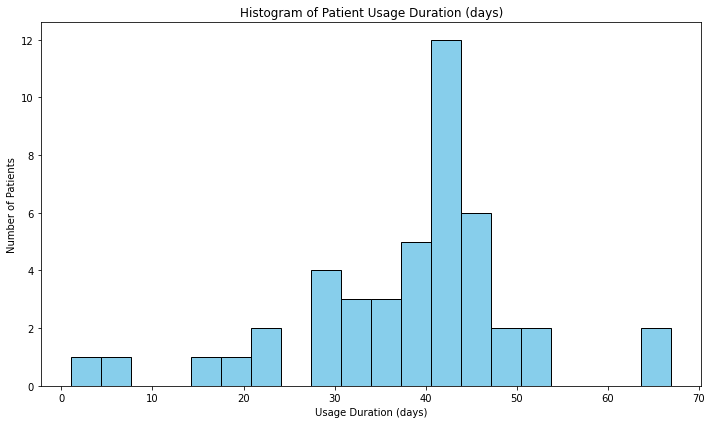

In [106]:
usage_stats = recordings.groupby('PATIENT_ID')['SESSION_DATE'].agg(['min', 'max']).reset_index()

# Calculate usage duration as the difference between max and min session dates
usage_stats['usage_duration'] = usage_stats['max'] - usage_stats['min']


usage_stats['usage_days'] = usage_stats['usage_duration'].dt.total_seconds() / (3600 * 24)

# Create a histogram of usage days
plt.figure(figsize=(10, 6))
plt.hist(usage_stats['usage_days'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel("Usage Duration (days)")
plt.ylabel("Number of Patients")
plt.title("Histogram of Patient Usage Duration (days)")
plt.tight_layout()
plt.show()

In [140]:
import pandas as pd



# Dictionary to hold the results
adherence_dict = {}

for _, prescription in prescriptions.iterrows():
    # Extract prescription details
    patient_id = prescription["PATIENT_ID"]
    protocol = prescription["PROTOCOL_ID"]
    start_date = prescription["STARTING_DATE"]
    end_date = prescription["ENDING_DATE"]
    # WEEKDAY is a string like "MONDAY"
    prescribed_weekday = prescription["WEEKDAY"].upper()  # ensure uppercase
    prescribed_duration = prescription["SESSION_DURATION"]

    # Cap the prescription window to 7 weeks from the start date
    if patient_id in patient_start:
        cap_date = patient_start[patient_id] + pd.Timedelta(weeks=7)
    else:
        cap_date = start_date
    
    effective_end_date = min(end_date, cap_date)

    # Generate all dates from start_date to effective_end_date
    all_dates = pd.date_range(start=start_date, end=effective_end_date)
    # Filter for dates that match the prescribed weekday.
    prescribed_dates = [
        d for d in all_dates if d.strftime("%A").upper() == prescribed_weekday
    ]

    # Dictionary to store adherence for each prescribed date
    adherence_per_date = {}
    adherence_per_day = {}

    for date in prescribed_dates:
        # For each date, filter sessions matching patient, protocol, and date.
        # Normalize dates to ignore the time component.
        session_rows = recordings[
            (recordings["PATIENT_ID"] == patient_id) &
            (recordings["PROTOCOL_ID"] == protocol) &
            (recordings["SESSION_DATE"].dt.normalize() == date.normalize())
        ]
        
        if not session_rows.empty:
            # Sum all session durations for that date (handle multiple sessions)
            total_actual_duration = session_rows["RECORDING_VALUE"].sum()
            adherence = min(1, total_actual_duration/prescribed_duration)
            adherence_day = 1
        else:
            adherence = 0
            adherence_day = 0

        # Store the adherence for this date using just the date portion
        adherence_per_date[date.date()] = adherence
        adherence_per_day[date.date()] = adherence_day

    # Initialize the patient key if it doesn't exist yet
    if patient_id not in adherence_dict:
        adherence_dict[patient_id] = {}
    
    # Store the protocol's adherence info.
    # (If a patient has multiple prescriptions for the same protocol,
    #  you might need additional logic to combine them.)
    adherence_dict[patient_id][protocol] = {
        "adherence_per_session": adherence_per_date,
        "adherence_per_day":adherence_per_day
    }



In [141]:
records = []
for patient, protocols in adherence_dict.items():
    for protocol, details in protocols.items():
        hospital = patient_to_hospital[patient]
        for session_date, adherence in details["adherence_per_session"].items():
            records.append({
                "patient": patient,
                "protocol": protocol,
                "hospital": hospital,
                "session_date": session_date,  # this is a date object
                "adherence": adherence,
               
            })
day_col = []
for patient, protocols in adherence_dict.items():
    for protocol, details in protocols.items():
        hospital = patient_to_hospital[patient]
        for session_date, adherence in details["adherence_per_day"].items():
            day_col.append(adherence)


df_sessions = pd.DataFrame(records)
df_sessions["adherence_day"] = day_col

In [153]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from ipywidgets import interactive_output, Tab, FloatSlider
from IPython.display import display

df_sessions['session_date'] = pd.to_datetime(df_sessions['session_date'])

# -----------------------------------------------------------------------------
# Function for session-based adherence plots.
def update_session_plots(threshold):
    # Filter patients based on the usage_days threshold.
    valid_patients = usage_stats.loc[usage_stats['usage_days'] >= threshold, 'PATIENT_ID']
    filtered_sessions = df_sessions[df_sessions['patient'].isin(valid_patients)]
    
    # Calculate average session-level adherence per patient.
    patient_adherence = (
        filtered_sessions.groupby('patient')['adherence']
        .mean()
        .reset_index()
    )
    
    # Create two subplots.
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    
    # Histogram for patient-level adherence.
    sns.histplot(patient_adherence['adherence'], bins=10, kde=False, 
                 color='skyblue', edgecolor='black', ax=axes[0])
    axes[0].set_title("Distribution of Average Session-based Adherence per Patient")
    axes[0].set_xlabel("Average Adherence")
    axes[0].set_ylabel("Number of Patients")
    num_patients = len(patient_adherence)
    axes[0].text(0.6, 0.95, f"Total Patients: {num_patients}", 
                 transform=axes[0].transAxes, ha="right", va="top",
                 bbox=dict(facecolor="white", alpha=0.5))
    
    # For hospital-level session-based adherence, we compute the mean per hospital.
    hosp_session = filtered_sessions.groupby('hospital')['adherence'].mean().reset_index()
    # Bar plot for hospital-level adherence.
    sns.barplot(data=hosp_session, x='hospital', y='adherence', ax=axes[1])
    axes[1].set_title("Session-based Adherence per Hospital")
    axes[1].set_xlabel("Hospital")
    axes[1].set_ylabel("Average Adherence")
    
    plt.tight_layout()
    plt.show()

# -----------------------------------------------------------------------------
# Function for day-based adherence plots (with prescription check).
def update_day_plots(threshold):
        # Filter patients based on the usage_days threshold.
    valid_patients = usage_stats.loc[usage_stats['usage_days'] >= threshold, 'PATIENT_ID']
    filtered_sessions = df_sessions[df_sessions['patient'].isin(valid_patients)]
    
    # Calculate average session-level adherence per patient.
    patient_adherence = (
        filtered_sessions.groupby('patient')['adherence_day']
        .mean()
        .reset_index()
    )
    
    # Create two subplots.
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    
    # Histogram for patient-level adherence.
    sns.histplot(patient_adherence['adherence_day'], bins=10, kde=False, 
                 color='skyblue', edgecolor='black', ax=axes[0])
    axes[0].set_title("Distribution of Average Session-based Adherence per Patient")
    axes[0].set_xlabel("Average Adherence")
    axes[0].set_ylabel("Number of Patients")
    num_patients = len(patient_adherence)
    axes[0].text(0.6, 0.95, f"Total Patients: {num_patients}", 
                 transform=axes[0].transAxes, ha="right", va="top",
                 bbox=dict(facecolor="white", alpha=0.5))
    
    # For hospital-level session-based adherence, we compute the mean per hospital.
    hosp_session = filtered_sessions.groupby('hospital')['adherence_day'].mean().reset_index()
    # Bar plot for hospital-level adherence.
    sns.barplot(data=hosp_session, x='hospital', y='adherence_day', ax=axes[1])
    axes[1].set_title("Session-based Adherence per Hospital")
    axes[1].set_xlabel("Hospital")
    axes[1].set_ylabel("Average Adherence")
    
    plt.tight_layout()
    plt.show()

    
# -----------------------------------------------------------------------------
# Create a common interactive slider for the usage threshold (in days).
max_usage = usage_stats['usage_days'].max() if not usage_stats.empty else 30
threshold_slider = FloatSlider(min=0, max=45, step=0.1, value=0, description="Min Usage (days)")

# Create interactive outputs for each adherence definition.
session_out = interactive_output(update_session_plots, {'threshold': threshold_slider})
day_out = interactive_output(update_day_plots, {'threshold': threshold_slider})

# Place the two outputs in a Tab widget.
tab = Tab(children=[session_out, day_out])
tab.set_title(0, "Session-based Adherence")
tab.set_title(1, "Day-based Adherence")

# Display the slider and the tabs.
display(threshold_slider, tab)


FloatSlider(value=0.0, description='Min Usage (days)', max=45.0)